# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Satria Nugraha Saputra
- **Email:** satrians49@gmail.com
- **ID Dicoding:** satria05

## Menentukan Pertanyaan Bisnis

* Berapa jumlah rata-rata persewaan sepeda dalam rentang waktu tertentu, dan bagaimana fluktuasinya pada berbagai waktu dalam sehari?
* Sejauh mana faktor cuaca memengaruhi jumlah persewaan sepeda rata-rata?
* Bagaimana pengaruh hari libur atau tanggal tertentu terhadap perubahan jumlah persewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
day = pd.read_csv(r'D:\portfolio\Proyek Analisis Data\Data\day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour = pd.read_csv(r'D:\portfolio\Proyek Analisis Data\Data\hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Memeriksa tipe data dari tiap kolom yang terdapat dalam bike

In [6]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Semua tipe data sesuai

Selanjutnya menilai data bike

In [8]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan hasil pengecekan diatas, tidak terdapat masalah dalam dataset day dan hour

In [10]:
print('jumlah duplicate day: ', day.duplicated().sum())
print('jumlah duplicate hours: ', hour.duplicated().sum())

jumlah duplicate day:  0
jumlah duplicate hours:  0


In [11]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Semua tipe data sesuai dalam dataset day dan hour dan tidak terdapat masalah dalam dataset day dan hour

## Exploratory Data Analysis (EDA)

### Explore data day
pertama akan mengekplorasi data day terlebih dahulu. seperti yang diketahui, dataset ini memuat berbagai informasi terkait bike, seperti instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, dan cnt.

sebagi permulaan, disini akan melihat rangkuman parameter statistik dari data day dan hourmenggunakan method describe().

In [13]:
day.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [14]:
hour.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


berdasarkan rangkuman parameter statistik di atas, diperoleh informasi jumlah bike pada day sebanyak 731 dan dari data hour sebanyak 17379.

selanjutnya merge dataframe

In [15]:
bike = hour.merge(day, how='inner', on='dteday', suffixes=('_hour', '_day'))
bike.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


Tambah kolom weather labels

In [16]:
weather_labels = {
    1: 'Jernih',
    2: 'Kabut',
    3: 'Cerah Hujan Ringan',
    4: 'Cerah Hujan Lebat',
}

bike['weather_labels'] = bike['weathersit_day'].map(weather_labels)

In [17]:
bike.describe(include='all')

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,weather_labels
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jernih
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11040
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,NaN
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947,NaN
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,NaN
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000,NaN
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000,NaN


In [18]:
bike.groupby('weather_labels')['cnt_day'].mean().reset_index().sort_values('cnt_day')

,weather_labels,cnt_day
0,Cerah Hujan Ringan,1914.700855
2,Kabut,4062.717595
1,Jernih,4895.177083


In [19]:
bike.groupby('hr')['cnt_hour'].mean().reset_index()

,hr,cnt_hour
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


In [20]:
bike.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values('cnt_day')

,holiday_day,cnt_day
1,1,3750.060000
0,0,4556.906215


In [21]:
bike.registered_hour.sum()

2672662

## Visualization & Explanatory Analysis

* Berapa jumlah rata-rata sepeda yang disewa per jam, dan bagaimana pola perubahannya sepanjang hari
* Bagaimana kondisi cuaca memengaruhi jumlah persewaan sepeda secara rata-rata?
* Apa pengaruh hari libur atau tanggal khusus terhadap kenaikan atau penurunan jumlah persewaan sepeda?

### Pertanyaan 1:

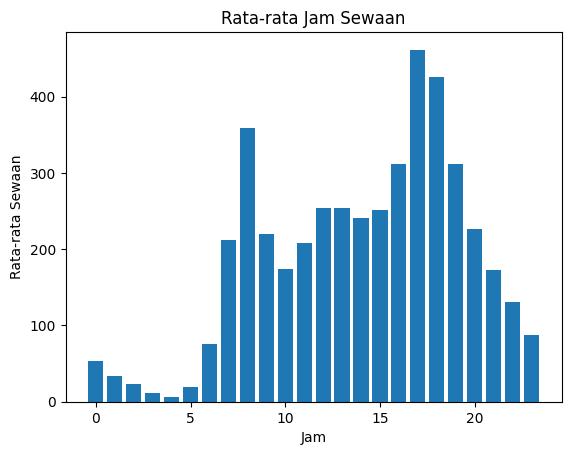

In [22]:
sewa_jam = bike.groupby('hr')['cnt_hour'].mean()
plt.bar(sewa_jam.index, sewa_jam.values, color='#1f77b4')

plt.title('Rata-rata Jam Sewaan')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Sewaan')

plt.show()

Rata - Rata Penyewaan sepeda paling banyak terjadi pada jam 17 dan 18 atau jam 5 PM dan 6 PM. Paling sedikit jam 4 AM

### Pertanyaan 2:

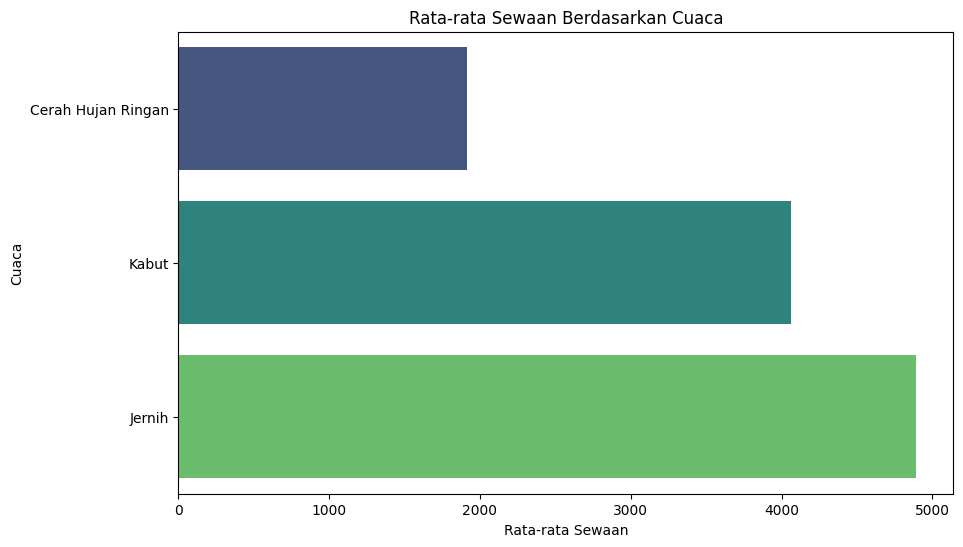

In [23]:
average_weather = bike.groupby('weather_labels')['cnt_day'].mean().reset_index().sort_values('cnt_day')

plt.figure(figsize=(10, 6))
sns.barplot(x='cnt_day', y='weather_labels', data=average_weather, palette='viridis', hue='weather_labels', dodge=False)
plt.legend([],[], frameon=False)  # Menyembunyikan legend karena hue hanya untuk warna

plt.title('Rata-rata Sewaan Berdasarkan Cuaca')
plt.xlabel('Rata-rata Sewaan')
plt.ylabel('Cuaca')

plt.show()


kondisi cuaca dengan jumlah rata-rata persewaan berhubungan erat seperti visualisasi diatas. Rata-rata persewaan paling banyak terjadi pada saat cuaca jernih dan paling sedikit terjadi saat cuaca hujan ringan

### Pertanyaan 3:

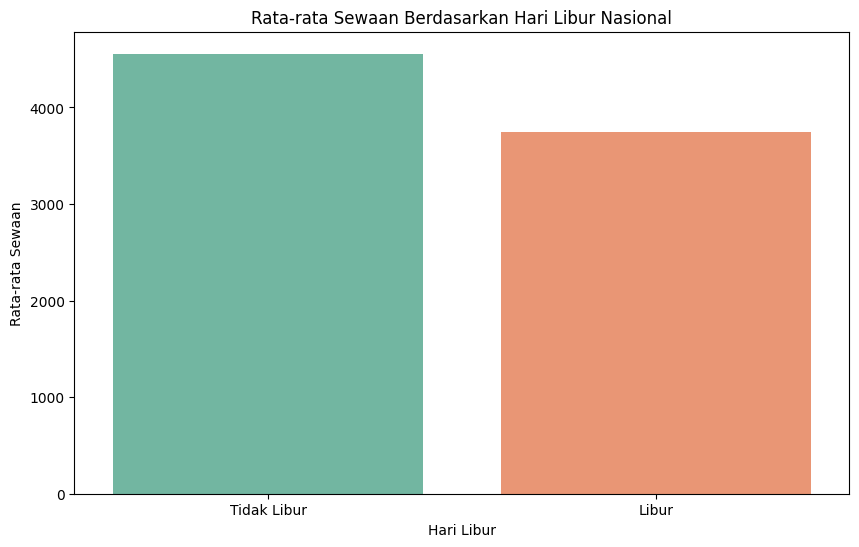

In [24]:
average_holiday = bike.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values('cnt_day')

plt.figure(figsize=(10, 6))
sns.barplot(x='holiday_day', y='cnt_day', data=average_holiday, palette='Set2', hue='holiday_day', dodge=False)
plt.legend([],[], frameon=False)  # Menyembunyikan legend karena hue hanya untuk warna

plt.title('Rata-rata Sewaan Berdasarkan Hari Libur Nasional')
plt.xlabel('Hari Libur')
plt.ylabel('Rata-rata Sewaan')
plt.xticks ([0,1],['Tidak Libur', 'Libur'])

plt.show()

Rate - rata penyewaan terjadi saat hari tidak libur ( Senin - Jumat )

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Kesimpulan pertanyaan 1 : Rata-rata penyewaan sepeda tertinggi terjadi pada pagi hari dan sore hari, yaitu sekitar pukul 8 pagi dan 6 sore.
    * Pola Transportasi Harian: Pukul 8 pagi biasanya bertepatan dengan awal hari kerja, di mana banyak orang menggunakan sepeda sebagai alat transportasi menuju kantor atau sekolah. Peningkatan penyewaan pada jam ini menunjukkan kebutuhan untuk mobilitas di pagi hari. Sementara itu, pukul 6 sore sering kali merupakan waktu pulang kerja atau sekolah, di mana sepeda menjadi pilihan populer untuk perjalanan pulang atau aktivitas rekreasi.
    * Aktivitas Rekreasi dan Kesehatan: Pukul 8 pagi juga merupakan waktu yang umum bagi orang untuk memulai hari dengan olahraga atau kegiatan fisik seperti bersepeda. Di sisi lain, pukul 6 sore adalah waktu yang cocok untuk beraktivitas fisik atau rekreasi setelah jam kerja.
    * Kondisi Cuaca: Pagi dan sore hari biasanya memiliki cuaca yang lebih nyaman, yang dapat mendorong orang untuk bersepeda. Cuaca yang baik pada waktu-waktu ini akan meningkatkan minat untuk melakukan aktivitas luar ruangan seperti bersepeda.
- Kesimpulan pertanyaan 2 : Kondisi cuaca memiliki pengaruh langsung terhadap rata-rata penyewaan sepeda, dengan cuaca cerah menjadi faktor utama.
    * Cuaca yang Mendukung Aktivitas Luar Ruangan: Cuaca cerah menciptakan kondisi yang lebih menyenangkan untuk kegiatan luar ruangan seperti bersepeda. Orang-orang lebih cenderung menyewa sepeda ketika cuaca cerah, karena mereka tidak terganggu oleh hujan atau kondisi buruk lainnya.
    * Minat yang Tinggi pada Cuaca Baik: Bersepeda seringkali berhubungan dengan hobi atau rekreasi, dan cuaca cerah dapat meningkatkan keinginan untuk bersepeda. Dengan cuaca yang menyenangkan, orang lebih termotivasi untuk keluar dan menikmati perjalanan dengan sepeda.
- Kesimpulan pertanyaan 3 : Hari libur nasional tidak berpengaruh terhadap rata-rata penyewaan sepeda, yang cenderung lebih tinggi pada hari kerja.
    * keterkaitan Hari Kerja: Hal ini mungkin karena tingginya aktivitas transportasi pada hari kerja, ketika orang pergi dan pulang dari tempat kerja atau sekolah.
    * pengaruh Kegiatan Harian: Peningkatan penyewaan sepeda pada hari kerja mungkin mencerminkan kebutuhan orang untuk menjalankan aktivitas rutin mereka, seperti bekerja atau bersekolah, di mana sepeda menjadi pilihan populer untuk perjalanan jarak pendek.
    * Penggunaan oleh Kelompok Tertentu: Penyewaan sepeda pada hari kerja mungkin juga lebih tinggi di kalangan kelompok tertentu, seperti pekerja atau pelajar, yang memanfaatkan layanan sepeda untuk kebutuhan transportasi harian mereka.